In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator
import requests

Using TensorFlow backend.


In [2]:
df = pd.read_json("Indian_Number_plates.json", lines=True)

In [3]:
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [4]:
df['annotation'][0][0]['imageWidth']

806

In [5]:
df['extras'].unique()

array([nan])

In [6]:
path = '/home/nabanita/anaconda3/envs/my_env_py3.7.4/submission_project/number_plate_detection_project'
os.mkdir(path+'/image')

In [7]:
top_x, top_y, bottom_x, bottom_y = [],[],[],[]
source_img, img_width, img_height = [],[],[]

for i, row in df.iterrows():
    
    img = requests.get(df['content'][i])
    with open("image/car_image_{}.jpeg".format(i), 'wb') as img_file:
        img_file.write(img.content)
    
    source_img.append("car_image_{}.jpeg".format(i))
    top_x.append(row['annotation'][0]['points'][0]['x'])
    top_y.append(row['annotation'][0]['points'][0]['y'])
    bottom_x.append(row['annotation'][0]['points'][1]['x'])
    bottom_y.append(row['annotation'][0]['points'][1]['y'])
    img_width.append(row['annotation'][0]['imageWidth'])
    img_height.append(row['annotation'][0]['imageHeight'])

In [9]:
#source_img

In [8]:
cols_list = [source_img, top_x, top_y, bottom_x, bottom_y, img_width, img_height]

In [9]:
final_df = pd.DataFrame(cols_list).transpose()
final_df.head()

,0,1,2,3,4,5,6
0,car_image_0.jpeg,0.722084,0.587983,0.868486,0.688841,806,466
1,car_image_1.jpeg,0.161943,0.85078,0.582996,1,494,449
2,car_image_2.jpeg,0.082,0.697452,0.23,0.828025,500,314
3,car_image_3.jpeg,0.434,0.667377,0.718,0.765458,500,469
4,car_image_4.jpeg,0.208791,0.390764,0.865135,0.984014,1001,563


In [10]:
final_df.columns = ['source_img', 'top_x', 'top_y', 'bottom_x', 'bottom_y', 'img_width', 'img_height']
final_df.head()

,source_img,top_x,top_y,bottom_x,bottom_y,img_width,img_height
0,car_image_0.jpeg,0.722084,0.587983,0.868486,0.688841,806,466
1,car_image_1.jpeg,0.161943,0.85078,0.582996,1,494,449
2,car_image_2.jpeg,0.082,0.697452,0.23,0.828025,500,314
3,car_image_3.jpeg,0.434,0.667377,0.718,0.765458,500,469
4,car_image_4.jpeg,0.208791,0.390764,0.865135,0.984014,1001,563


In [11]:
final_df.to_csv('final_df.csv', index=False)

In [12]:
final_df = pd.read_csv('final_df.csv')

In [13]:
final_df.head()

,source_img,top_x,top_y,bottom_x,bottom_y,img_width,img_height
0,car_image_0.jpeg,0.722084,0.587983,0.868486,0.688841,806,466
1,car_image_1.jpeg,0.161943,0.850780,0.582996,1.000000,494,449
2,car_image_2.jpeg,0.082000,0.697452,0.230000,0.828025,500,314
3,car_image_3.jpeg,0.434000,0.667377,0.718000,0.765458,500,469
4,car_image_4.jpeg,0.208791,0.390764,0.865135,0.984014,1001,563


In [14]:
final_df.dtypes

source_img     object
top_x         float64
top_y         float64
bottom_x      float64
bottom_y      float64
img_width       int64
img_height      int64
dtype: object

In [15]:
final_df.shape

(237, 7)

In [16]:
def mark_number_plate(img_num):
    
    """
    
    """
    
    img = cv2.imread("image/car_image_{}.jpeg".format(img_num))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    top_x = int(final_df['top_x'][img_num] * final_df['img_width'][img_num])
    top_y = int(final_df['top_y'][img_num] * final_df['img_height'][img_num])
    bottom_x = int(final_df['bottom_x'][img_num] * final_df['img_width'][img_num])
    bottom_y = int(final_df['bottom_y'][img_num] * final_df['img_height'][img_num])
    
    img_copy = img.copy()
    cv2.rectangle(img_copy, (top_x,top_y), (bottom_x, bottom_y), (255,0,0), 10)

    plt.imshow(img_copy)

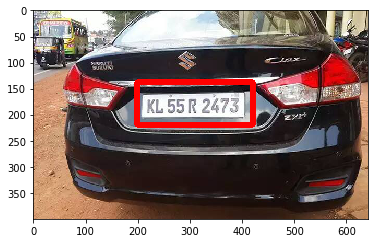

In [17]:
mark_number_plate(10)

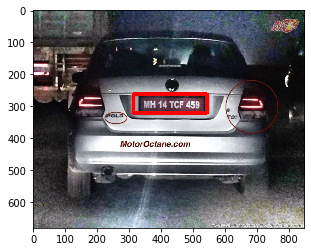

In [18]:
mark_number_plate(35)

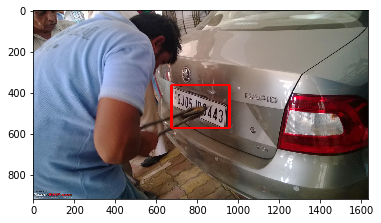

In [19]:
mark_number_plate(9)

In [37]:
final_df.head()

,source_img,top_x,top_y,bottom_x,bottom_y,img_width,img_height
0,car_image_0,0.722084,0.587983,0.868486,0.688841,806,466
1,car_image_1,0.161943,0.850780,0.582996,1.000000,494,449
2,car_image_2,0.082000,0.697452,0.230000,0.828025,500,314
3,car_image_3,0.434000,0.667377,0.718000,0.765458,500,469
4,car_image_4,0.208791,0.390764,0.865135,0.984014,1001,563


In [20]:
final_df['top_x'] = final_df['top_x'] * final_df['img_width']

In [39]:
final_df.head()

,source_img,top_x,top_y,bottom_x,bottom_y,img_width,img_height
0,car_image_0,582.0,0.587983,0.868486,0.688841,806,466
1,car_image_1,80.0,0.850780,0.582996,1.000000,494,449
2,car_image_2,41.0,0.697452,0.230000,0.828025,500,314
3,car_image_3,217.0,0.667377,0.718000,0.765458,500,469
4,car_image_4,209.0,0.390764,0.865135,0.984014,1001,563


In [21]:
final_df['bottom_x'] = final_df['bottom_x'] * final_df['img_width']
final_df['top_y'] = final_df['top_y'] * final_df['img_height']
final_df['bottom_y'] = final_df['bottom_y'] * final_df['img_height']

In [41]:
final_df.head()

,source_img,top_x,top_y,bottom_x,bottom_y,img_width,img_height
0,car_image_0,582.0,274.0,700.0,321.0,806,466
1,car_image_1,80.0,382.0,288.0,449.0,494,449
2,car_image_2,41.0,219.0,115.0,260.0,500,314
3,car_image_3,217.0,313.0,359.0,359.0,500,469
4,car_image_4,209.0,220.0,866.0,554.0,1001,563


In [22]:
final_df.drop(['img_width', 'img_height'], axis=1, inplace=True)

In [43]:
final_df.head()

,source_img,top_x,top_y,bottom_x,bottom_y
0,car_image_0,582.0,274.0,700.0,321.0
1,car_image_1,80.0,382.0,288.0,449.0
2,car_image_2,41.0,219.0,115.0,260.0
3,car_image_3,217.0,313.0,359.0,359.0
4,car_image_4,209.0,220.0,866.0,554.0


In [45]:
final_df.shape

(237, 5)

In [23]:
split_idx = len(final_df) - int(len(final_df)*0.03)
split_idx

230

In [24]:
train_df = final_df.iloc[:split_idx, :]
test_df = final_df.iloc[split_idx:, :]

In [80]:
train_df.shape, test_df.shape

((230, 5), (7, 5))

In [91]:
train_df.head()

,source_img,top_x,top_y,bottom_x,bottom_y
0,car_image_0,582.0,274.0,700.0,321.0
1,car_image_1,80.0,382.0,288.0,449.0
2,car_image_2,41.0,219.0,115.0,260.0
3,car_image_3,217.0,313.0,359.0,359.0
4,car_image_4,209.0,220.0,866.0,554.0


In [25]:
image_gen = ImageDataGenerator(rescale=1/255,
                               validation_split=0.1)

In [97]:
path_to_image_directory = '/home/nabanita/anaconda3/envs/my_env_py3.7.4/submission_project/number_plate_detection_project/image'

In [26]:
train_gen = image_gen.flow_from_dataframe(train_df, directory="image/",
                                          x_col='source_img', 
                                          y_col=['top_x','top_y','bottom_x','bottom_y'], 
                                          target_size=(256,256), 
                                          class_mode='raw',
                                          batch_size=32, 
                                          subset='training')

#val_gen = image_gen.flow_from_dataframe(train_df, directory='image', x_col='source_img', 
#                                        y_col=['top_x','top_y','bottom_x','bottom_y'],
#                                        target_size=(256.256), class_mode=None,
#                                        batch_size=32, subset='validation')

Found 207 validated image filenames.


In [27]:
val_gen = image_gen.flow_from_dataframe(train_df, directory="image/",
                                          x_col='source_img', 
                                          y_col=['top_x','top_y','bottom_x','bottom_y'], 
                                          target_size=(256,256), 
                                          class_mode='raw',
                                          batch_size=32, 
                                          subset='validation')

Found 23 validated image filenames.
